# *Перцептрон*

In [ ]:
import random
import numpy as np

# Обучающая выборка для цифры 9
num0 = list('111101101101111')
num1 = list('001001001001001')
num2 = list('111001111100111')
num3 = list('111001111001111')
num4 = list('101101111001001')
num5 = list('111100111001111')
num6 = list('111100111101111')
num7 = list('111001001001001')
num8 = list('111101111101111')
num9 = list('111101111001111')
nums = [num0, num1, num2, num3, num4, num5, num6, num7, num8, num9]

# Номер цифры, которую мы обучаем определять
tema = 9

n_sensors = len(num0)
weights = [0] * n_sensors

def perceptron(sensor):
    threshold = 7
    total = sum(int(sensor[i]) * weights[i] for i in range(n_sensors))
    return total >= threshold

def decrease(number):
    for i in range(n_sensors):
        if number[i] == '1':
            weights[i] -= 1

def increase(number):
    for i in range(n_sensors):
        if number[i] == '1':
            weights[i] += 1

# Тренировка сети
n_epochs = 100000
for _ in range(n_epochs):
    j = random.randint(0, 9)
    result = perceptron(nums[j])

    if j != tema:
        if result:
            decrease(nums[j])
    else:
        if not result:
            increase(nums[tema])

# Вывод значений весов
print("Final Weights:", weights)

# Тестовая выборка для цифры 9
test_num1 = list('111101111001111')
test_num2 = list('111100001001111')
test_num3 = list('110101111001011')
test_num4 = list('101101111001101')


# Проверка работы программы на тестовой выборке
print("Recognized 9:", perceptron(test_num1))
print("Recognized 9:", perceptron(test_num2))
print("Recognized 9:", perceptron(test_num3))
print("Recognized 9:", perceptron(test_num4))





Final Weights: [-1, 0, -1, 4, 0, 3, 0, 3, -1, -5, 0, -1, 1, 1, -1]
Recognized 9: True
Recognized 9: False
Recognized 9: True
Recognized 9: False


# *Модель нейронной сети с обратным распространением ошибки*




Epoch: 0, Loss: 0.49993488625005156
Epoch: 1000, Loss: 0.4999854680736028
Epoch: 2000, Loss: 0.4999390921559249
Epoch: 3000, Loss: 0.49990811903947807
Epoch: 4000, Loss: 0.49987674165688956
Epoch: 5000, Loss: 0.49983560862475584
Epoch: 6000, Loss: 0.4997735467055579
Epoch: 7000, Loss: 0.4996703167163825
Epoch: 8000, Loss: 0.4994811139967605
Epoch: 9000, Loss: 0.49909117135452696


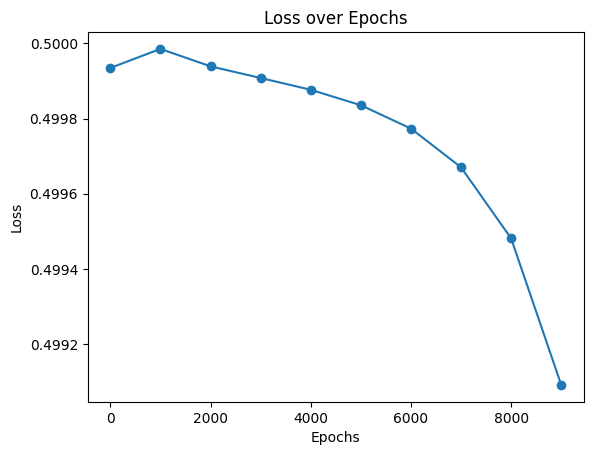

Predictions after training:
[[0.50986965]
 [0.52532761]
 [0.47473491]
 [0.48283775]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
'''
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
  return np.where(x > 0, 1, 0)
'''
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Входные данные для XOR
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Настройка параметров сети
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1
epochs = 10000
display_interval = 1000

# Инициализация весов
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Доп. для построения графика
losses = []

# Обучение сети с использованием метода обратного распространения
for epoch in range(epochs):
    # Прямое распространение (forward pass)
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Вычисление ошибки
    error = outputs - predicted_output

    # Обратное распространение (backward pass)
    output_delta = error * sigmoid_derivative(predicted_output)
    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # Обновление весов
    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

    # Вывод потерь на каждой 1000-й эпохе и добавление в массив
    if epoch % display_interval == 0:
        loss = np.mean(np.abs(error))
        losses.append(loss)
        print(f"Epoch: {epoch}, Loss: {loss}")

# Построение графика потерь по времени
plt.plot(range(0, epochs, display_interval), losses, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Тестирование обученной сети на XOR
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_outputs = sigmoid(np.dot(sigmoid(np.dot(test_inputs, weights_input_hidden)), weights_hidden_output))

print("Predictions after training:")
print(test_outputs)

- Прямое распространение:
  - Входные данные `inputs` умножаются на матрицу весов `weights_input_hidden`, чтобы получить входное значение скрытого слоя `hidden_layer_input`.
  - Значение скрытого слоя `hidden_layer_output` получается применением сигмоидной функции активации к `hidden_layer_input`.
  - Значение выходного слоя `predicted_output` вычисляется аналогично для скрытого слоя.

- Обратное распространение:
  - Вычисляется ошибка `error` путем вычитания ожидаемого вывода `outputs` от предсказанного вывода `predicted_output`.
  - Затем вычисляется дельта выходного слоя `output_delta` путем умножения ошибки на производную сигмоидной функции активации в точке `predicted_output`.
  - Далее, с помощью транспонирования матрицы весов `weights_hidden_output` умножаем `output_delta` для получения ошибки скрытого слоя `hidden_layer_error`.
  - Затем вычисляется дельта скрытого слоя `hidden_layer_delta` путем умножения ошибки скрытого слоя на производную сигмоидной функции активации в точке `hidden_layer_output`.

- Обновление весов:
  - Веса `weights_hidden_output` обновляются путем умножения транспонированного значения скрытого слоя на дельту выходного слоя с учетом скорости обучения.
  - Веса `weights_input_hidden` обновляются путем умножения транспонированных входных данных на дельту скрытого слоя с учетом скорости обучения.

# *Сигнальный метод Хебба*

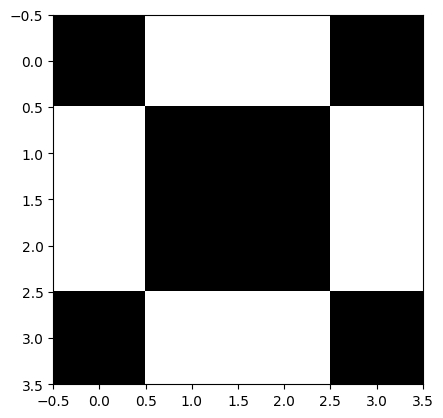

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации весов
def plot_weights(weights):
    weights = weights.reshape((4, 4))  # Преобразование весов в матрицу 4x4
    plt.imshow(weights, cmap='gray', interpolation='nearest')
    plt.show()

# Обучающие данные (изображение буквы "О")
X = np.array([[0, 1, 1, 0],
              [1, 0, 0, 1],
              [1, 0, 0, 1],
              [0, 1, 1, 0]])

# Процесс обучения (Сигнальный метод обучения Хебба)
weights = np.zeros(16)  # 4x4 матрица весов
learning_rate = 0.1

for _ in range(100):
    for x in X.flatten():  # Преобразуем матрицу входов в одномерный массив
        weights += learning_rate * x * X.flatten()

# Визуализируем обученные веса
plot_weights(weights)




1. Инициализируются веса сети (обычно нулями или малыми случайными значениями).
2. Для каждой пары входных и выходных сигналов алгоритм выполняет следующие шаги:
   - Умножает каждый входной сигнал на соответствующий ему выходной сигнал.
   - Полученное произведение прибавляется к весам сети, обновляя их.
3. Повторяются шаги 2 для всех доступных пар входных и выходных сигналов.
4. После обучения сети по всем доступным данным, полученные веса могут быть использованы для предсказания выходного значения по новым входным данным.

# *Алгоритм Кохонена*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных (100 000 объектов)
np.random.seed(42)
data = np.random.rand(100000, 3)

# Размер сетки Kohonen
grid_size = 40
input_size = 3

# Инициализация весов сети Kohonen
weights = np.random.rand(grid_size, grid_size, input_size)

# Функция для нахождения ближайшего нейрона (победителя)
def find_best_matching_unit(sample):
    distances = np.linalg.norm(weights - sample, axis=2)
    indices = np.unravel_index(np.argmin(distances), distances.shape)
    return indices

# Обучение сети Kohonen
learning_rate = 0.1
num_epochs = 10

for epoch in range(num_epochs):
    for sample in data:
        winner = find_best_matching_unit(sample)
        weights[winner] += learning_rate * (sample - weights[winner])

# Визуализация результатов
plt.figure(figsize=(10, 10))
for sample in data:
    winner = find_best_matching_unit(sample)
    plt.plot(winner[1], winner[0], 'o', color=sample)

plt.title('Kohonen Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


KeyboardInterrupt: 

Этапы выполнения алгоритма Кохонена:

1. Инициализация: Создаются случайные весовые значения для каждого нейрона в сети. Эти веса представляют собой точки в многомерном пространстве, инициализированные случайным образом.

2. Выбор образца: Из обучающего набора данных выбирается случайный образец.

3. Поиск победителя: Вычисляется расстояние между выбранным образцом и каждым нейроном в сети. Нейрон с наименьшим расстоянием (победитель) выбирается.

4. Обновление весов: Веса победителя и его соседей (в определенном радиусе) обновляются, чтобы стать ближе к выбранному образцу. Это позволяет сети сгруппировать близкие образцы вблизи друг друга.

5. Повторение: Шаги 2-4 повторяются для всех образцов в обучающем наборе данных.
Основной смысл алгоритма Кохонена заключается в создании структуры, которая способна находить сходство в данных и создавать группировки объектов, позволяя нам наблюдать их внутреннюю структуру и отношения. Это может быть полезно для множества задач, включая кластеризацию, снижение размерности данных, анализ данных и визуализацию.

Основной смысл алгоритма Кохонена заключается в создании структуры, которая способна находить сходство в данных и создавать группировки объектов, позволяя нам наблюдать их внутреннюю структуру и отношения. Это может быть полезно для множества задач, включая кластеризацию, снижение размерности данных, анализ данных и визуализацию.

# *Метод потенциальных функций*

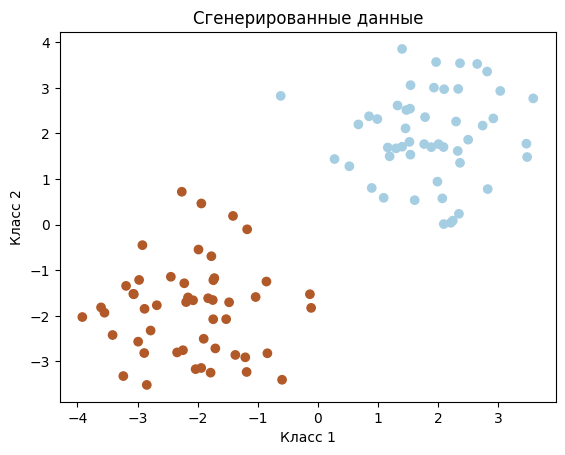

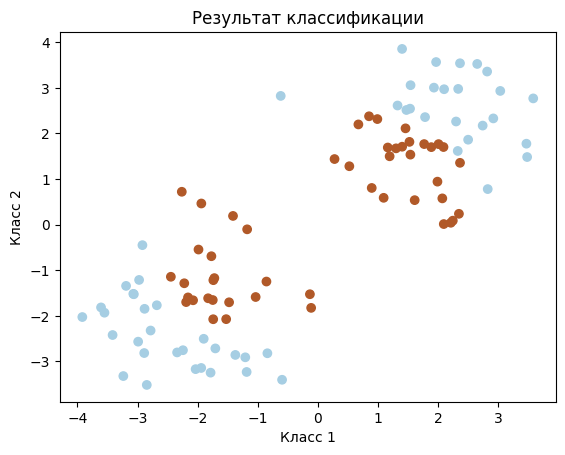

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных для двух классов
np.random.seed(42)
class1 = np.random.randn(50, 2) + np.array([2, 2])
class2 = np.random.randn(50, 2) + np.array([-2, -2])

# Объединение данных в один массив
data = np.vstack([class1, class2])

# Метки классов: 0 для первого класса, 1 для второго класса
labels = np.array([0] * 50 + [1] * 50)

# Визуализация данных
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired)
plt.title('Сгенерированные данные')
plt.xlabel('Класс 1')
plt.ylabel('Класс 2')
plt.show()

# Определение потенциальной функции
def potential_function(x):
    return np.sum(x**2, axis=1)

# Классификация на основе потенциальной функции
def classify_with_potential(data, potential_function_threshold):
    potentials = potential_function(data)
    predictions = (potentials < potential_function_threshold).astype(int)
    return predictions

# Задаем порог потенциальной функции для классификации
threshold = 8.0

# Классификация данных
predictions = classify_with_potential(data, threshold)

# Визуализация результата классификации
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap=plt.cm.Paired)
plt.title('Результат классификации')
plt.xlabel('Класс 1')
plt.ylabel('Класс 2')
plt.show()


В этом примере мы создаем два класса данных, которые имеют нормальное распределение вокруг разных центров. Затем мы определяем простую потенциальную функцию, которая просто суммирует квадраты признаков. Классификация происходит на основе значения этой потенциальной функции: если значение меньше порога, объект относится к одному классу, в противном случае - к другому.

# *Алгоритм с ковариациями и с квадратичными описаниями*

In [ ]:
import numpy as np

# Генерация случайных точек
def generate_points(n):
    points = []
    for _ in range(n):
        x = np.random.normal(0, 1)
        y = np.random.normal(0, 1)
        points.append([x, y])
    return points

# Вычисление ковариационной матрицы
def compute_covariance_matrix(points):
    n = len(points)
    sum_x = sum(point[0] for point in points)
    sum_y = sum(point[1] for point in points)
    mean_x = sum_x / n
    mean_y = sum_y / n
    covariance_matrix = np.zeros((2, 2))
    for point in points:
        x_diff = point[0] - mean_x
        y_diff = point[1] - mean_y
        covariance_matrix[0, 0] += x_diff * x_diff
        covariance_matrix[0, 1] += x_diff * y_diff
        covariance_matrix[1, 0] += x_diff * y_diff
        covariance_matrix[1, 1] += y_diff * y_diff
    covariance_matrix = covariance_matrix / n
    return covariance_matrix

# Поиск квадратичного описания
def find_quadratic_description(covariance_matrix):
    a = covariance_matrix[0, 0]
    b = covariance_matrix[0, 1] + covariance_matrix[1, 0]
    c = covariance_matrix[1, 1]
    return a, b, c

# Главная функция
def main():
    n = int(input("Введите количество точек: "))
    points = generate_points(n)
    covariance_matrix = compute_covariance_matrix(points)
    a, b, c = find_quadratic_description(covariance_matrix)
    print("Квадратичное описание:")
    print("a =", a)
    print("b =", b)
    print("c =", c)

if __name__ == "__main__":
    main()


Введите количество точек: 5
Квадратичное описание:
a = 0.14748810494955564
b = -0.05066410981565035
c = 0.5888817742032534


1. Вычисление ковариационной матрицы: Ковариационная матрица представляет собой матрицу, в которой элементы показывают степень взаимосвязи между парами переменных в наборе данных. Вычисляется ковариация каждой пары переменных и собирается в матрицу.

2. Вычисление собственных значений и собственных векторов: Для ковариационной матрицы вычисляются собственные значения и соответствующие им собственные векторы. Собственные значения представляют важность каждой компоненты или направления в данных.

3. Выбор компонент: Из всех собственных значений выбираются компоненты, которые объясняют наибольшую долю дисперсии в данных. Эти компоненты соответствуют главным направлениям или основным признакам данных.

Основное назначение алгоритма заключается в снижении размерности данных, то есть в нахождении более компактного описания данных с минимальной потерей информации. Это может быть полезно для визуализации данных, сокращения шума, избавления от мультиколлинеарности или для предварительной обработки данных перед применением других методов машинного обучения.

# *Метод предельных упрощений*

In [ ]:
def simplification(graph, threshold):
    # Создаем список вершин графа
    vertices = list(range(len(graph)))

    # Удаляем все ребра, чей вес превышает пороговое значение
    for i in vertices:
        for j in vertices:
            if graph[i][j] > threshold:
                graph[i][j] = 0

    # Удаляем все изолированные вершины
    isolated_vertices = [vertex for vertex in vertices if not any(graph[vertex])]
    for vertex in isolated_vertices:
        vertices.remove(vertex)
        graph.pop(vertex)
        for row in graph:
            row.pop(vertex)

    return graph

# Пример использования:
graph = [
    [0, 1, 0, 2, 0],
    [1, 0, 3, 0, 0],
    [0, 3, 0, 1, 0],
    [2, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
]

threshold = 2
simplified_graph = simplification(graph, threshold)
print(simplified_graph)


[[0, 1, 0, 2], [1, 0, 0, 0], [0, 0, 0, 1], [2, 0, 1, 0]]


Алгоритм метода предельных упрощений выглядит следующим образом:

1. Задать начальное приближение (например, значения переменных в системе уравнений).
2. Выразить одну переменную из каждого уравнения системы и подставить их значения в другие уравнения.
3. Если система уравнений нелинейная, то повторить предыдущий шаг несколько раз, подставляя новые значения из последней итерации в другие уравнения до сходимости.
4. Полученные в последней итерации значения переменных являются приближенным решением системы уравнений.



# *Коллективы решающих правил*

In [ ]:
def collectiv_decision(rule_set, votes, weights):
    num_rules = len(rule_set)
    num_votes = len(votes)

    # Проверяем количество голосов, количество правил и количество весов
    if num_votes <= 0 or num_rules <= 0 or num_votes != len(rule_set[0]) or num_rules != len(weights):
        print("Ошибка: Некорректные данные")
        return None

    # Создаем словарь для подсчета взвешенных голосов
    vote_count = {}
    for rule in rule_set:
        vote_count[tuple(rule)] = 0

    # Обрабатываем голоса каждого члена коллектива
    for i, vote in enumerate(votes):
        for j, rule in enumerate(rule_set):
            if all(v in vote for v in rule):
                vote_count[tuple(rule)] += weights[j][i]

    # Определяем решение на основе максимального взвешенного голоса
    decision = max(vote_count, key=vote_count.get)

    return decision

# Пример использования:
rule_set = [[1, 0, 1], [1, 1, 0], [0, 1, 1]] # Правила коллективного решения
votes = [[1, 0, 1], [1, 1, 0], [0, 1, 1]] # Голоса членов коллектива
weights = [[0.1, 0.6, 0.2], [0.4, 0.1, 0.1], [0.1, 0.2, 0.1]] # Веса голосов для каждого правила

decision = collectiv_decision(rule_set, votes, weights)
if decision:
    print("Решение коллектива:", decision)


Решение коллектива: (1, 0, 1)


В целом, метод коллективов решающих правил представляет собой эффективный способ увеличения точности и надежности решений в задачах машинного обучения или принятия решений. Он находит применение в различных областях, включая распознавание образов, классификацию данных, прогнозирование и другие задачи.

# *Кластерный анализ*


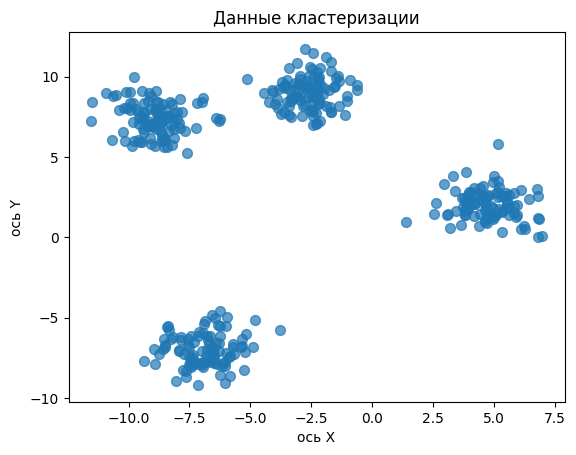

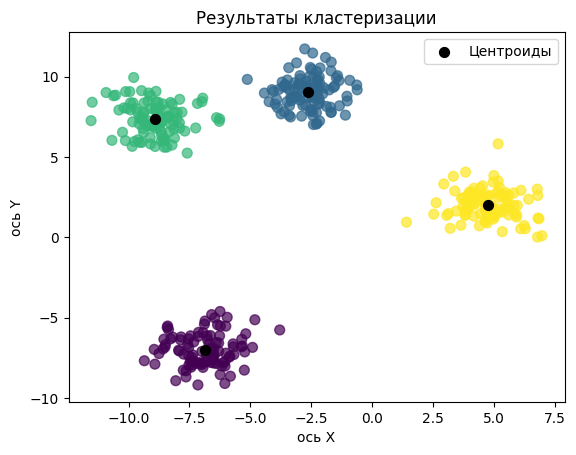

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Создаем синтетические данные
X, y = make_blobs(n_samples=400, centers=4, random_state=42, cluster_std=1.0)

# Визуализация синтетических данных
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.xlabel('ось X')
plt.ylabel('ось Y')
plt.title('Данные кластеризации')
plt.show()

class KMeans:
    def __init__(self, n_clusters=4, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)

        # Инициализация центроидов случайным образом из данных
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Рассчитываем расстояния от каждой точки до центроидов
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

            # Присваиваем каждой точке ближайший центроид
            labels = np.argmin(distances, axis=1)

            # Пересчитываем центроиды как средние значения точек в кластерах
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Если центроиды не изменились, завершаем алгоритм
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        return self.centroids, labels

# Инициализация и обучение модели
kmeans = KMeans(n_clusters=4, random_state=42)
centroids, labels = kmeans.fit(X)

# Визуализация результатов кластеризации
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='.', s=200, label='Центроиды')
plt.xlabel('ось X')
plt.ylabel('ось Y')
plt.title('Результаты кластеризации')
plt.legend()
plt.show()



# *Иерархическое группирование*



[1 2 4 3 3 5 6 8 7 7]


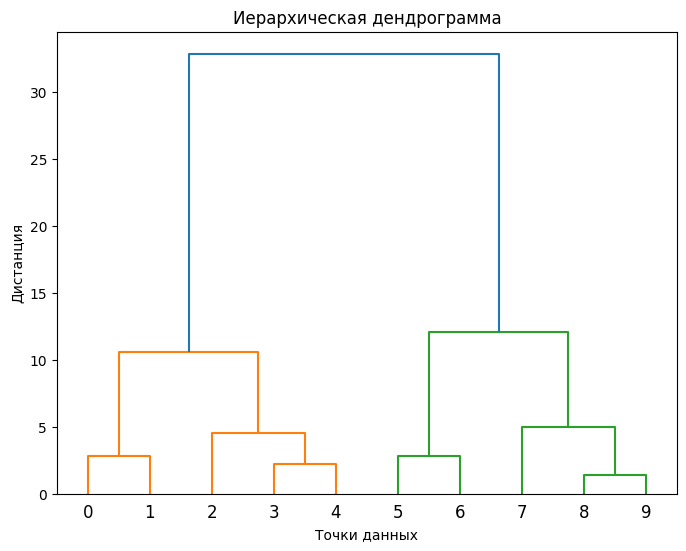

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def hierarchical_clustering(data):
    # Вычисляем матрицу расстояний
    distances = linkage(data, method='ward')

    # Строим дендрограмму
    plt.figure(figsize=(8, 6))
    dendrogram(distances)
    plt.title('Иерархическая дендрограмма')
    plt.xlabel('Точки данных')
    plt.ylabel('Дистанция')

    # Выполняем кластеризацию
    clusters = fcluster(distances, t=10, criterion='maxclust')
    # Здесь используется T-критерий для определения числа кластеров

    # Возвращаем результаты кластеризации
    return clusters

# Пример использования
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [8, 10], [11, 12], [13, 14], [15, 17], [18, 19], [19, 20]])
result = hierarchical_clustering(data)
print(result)
plt.show()

# *Модели применения падежей или времен*


In [ ]:
import pymorphy2

def apply_case(word, case):
    morph = pymorphy2.MorphAnalyzer()
    parsed_word = morph.parse(word)[0]
    return parsed_word.inflect({case}).word

word = 'стул'
cases = ['nomn', 'gent', 'datv', 'accs', 'ablt', 'loct']
# Список падежей в pymorphy2
real_cases = ['именительный', 'родительный', 'дательный', 'винительный', 'творительный', 'предложный']

for i in range(len(cases)):
    inflected_word = apply_case(word, cases[i])
    print(f'{word} в падеже {real_cases[i]}: {inflected_word}')

стул в падеже именительный: стул
стул в падеже родительный: стула
стул в падеже дательный: стулу
стул в падеже винительный: стул
стул в падеже творительный: стулом
стул в падеже предложный: стуле


# *Раскрытие скобок в выражениях*

In [ ]:
def expand_brackets(expression):
    stack = []
    result = ""

    for char in expression:
        if char == "(":
            stack.append(result)
            result = ""
        elif char == ")":
            prev_result = stack.pop()
            result = prev_result + result + result
        else:
            result += char

    return result


expression = input("Введите выражение с скобками: ")
expanded_expression = expand_brackets(expression)
print("Раскрытое выражение:", expanded_expression)


Введите выражение с скобками: (ghghg)
Раскрытое выражение: ghghgghghg


# *Поиск пути в лабиринте*

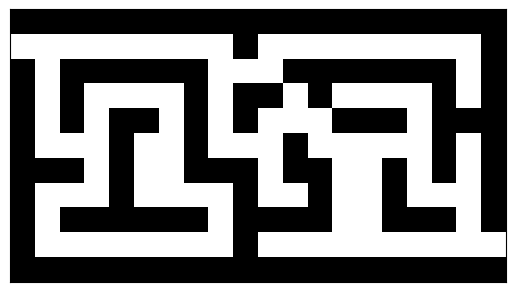

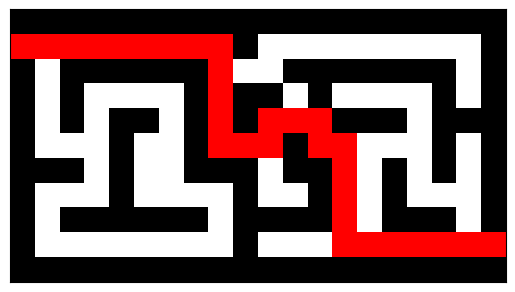

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def bfs(maze, start, end):
    queue = deque([start])
    visited = set([start])
    prev = {start: None}

    while queue:
        current = queue.popleft()

        if current == end:
            break

        row, col = current
        neighbors = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]

        for neighbor in neighbors:
            n_row, n_col = neighbor
            if 0 <= n_row < len(maze) and 0 <= n_col < len(maze[0]) and maze[n_row][n_col] == 0 and neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                prev[neighbor] = current

    path = []
    current = end
    while current is not None:
        path.append(current)
        current = prev[current]

    return path[::-1]

def visualize_maze(maze):
    cmap = plt.cm.colors.ListedColormap(['white', 'black'])
    bounds = [0, 1, 2]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(maze, cmap=cmap, norm=norm)

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

    plt.show()

def visualize_maze_with_path(maze, path):
    maze_with_path = np.array([row.copy() for row in maze])

    for point in path:
        row, col = point
        maze_with_path[row, col] = 2  # 2 to represent the path

    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red'])
    bounds = [0, 1, 2, 3]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(maze_with_path, cmap=cmap, norm=norm)

    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks

    plt.show()

# Задаем лабиринт
a = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]
# Задаем начальную и конечную точку
start_point = (1, 0)
end_point = (9, 19)

# Визуализируем лабиринт без пути
visualize_maze(a)

# Вызываем функцию поиска кратчайшего пути
shortest_path = bfs(a, start_point, end_point)

# Визуализируем лабиринт с кратчайшим путем
visualize_maze_with_path(a, shortest_path)


# *Моделирование нечеткой логики*

53.27272727272734


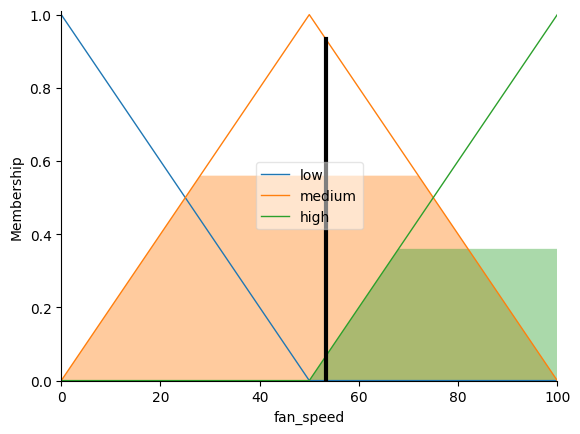

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Создание нечетких переменных и их диапазонов
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Определение лингвистических переменных
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Правила
rule1 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['medium'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])

# Создание системы нечеткого вывода
fan_control = ctrl.ControlSystem([rule1, rule2, rule3])
fan_control_simulation = ctrl.ControlSystemSimulation(fan_control)

# Ввод данных для моделирования
fan_control_simulation.input['temperature'] = 68
fan_control_simulation.input['humidity'] = 72

# Расчет результата
fan_control_simulation.compute()

# Вывод результатов
print(fan_control_simulation.output['fan_speed'])
fan_speed.view(sim=fan_control_simulation)
